In [ ]:
"""
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

"""

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('flight_price.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [5]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  10683
Number of columns:  11


In [ ]:
"""
Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

"""


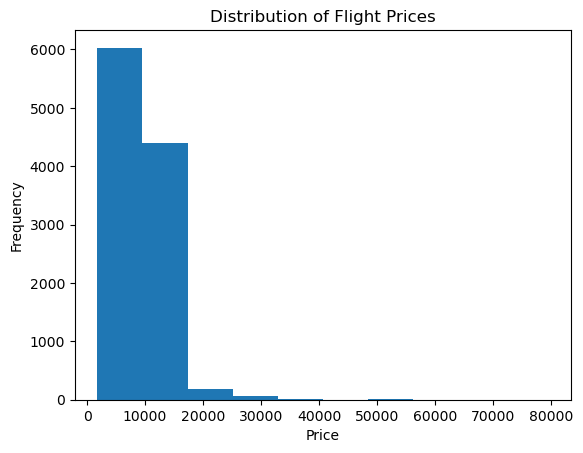

In [9]:
plt.hist(df['Price'],bins=10)
# Add axis labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')

# Show the plot
plt.show()

In [ ]:
"""
Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
"""

In [12]:
df['Price'].min(),df['Price'].max()

(1759, 79512)

In [ ]:
"""
Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.
"""

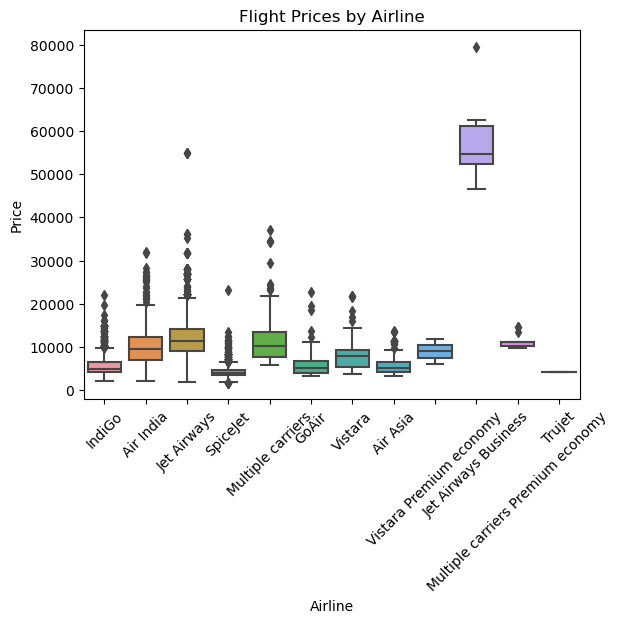

In [15]:
# Create a boxplot of flight prices by airline
sns.boxplot(x='Airline', y='Price', data=df)

# Add axis labels and a title
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Flight Prices by Airline')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
"""
Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

"""

In [16]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [26]:
# Calculate the interquartile range
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Find potential outliers using the IQR method
potential_outliers = df[(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)]



# Print the potential outliers
print(potential_outliers)


                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396          DEL → 

In [ ]:
"""
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

"""

In [ ]:
"""
To identify the peak travel season in the Flight Price dataset, we could analyze several features that are related to travel dates and times. Here are some potential features to consider:

Month: We could analyze the average flight prices by month to see if there are any months that are consistently more expensive than others.

Day of the week: We could analyze the average flight prices by day of the week to see if there are any days that are consistently more expensive than others.

Time of day: We could analyze the average flight prices by time of day to see if there are any times that are consistently more expensive than others.

Holidays and special events: We could look for any holidays or special events that may cause a spike in travel demand and higher flight prices.

To present our findings to our boss, we could create visualizations that show the average flight prices by each of these features. For example, we could create a line graph that shows the average flight prices by month, with each month represented as a data point on the graph. We could also create bar charts that show the average flight prices by day of the week and time of day.

In addition to these visualizations, we could provide a summary of our findings and any insights that we have gained from analyzing the data. We could highlight any trends or patterns that we have observed and make recommendations to our boss based on our analysis. For example, we might suggest that the company focus their marketing efforts on promoting travel during the off-season months when prices are lower, or that they offer special deals and promotions during holidays and special events to attract more customers.
"""

In [27]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [28]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [29]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [40]:
df['Price'].min(),df['Price'].max()

(1759, 79512)

In [ ]:
"""
Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?
"""

In [ ]:
"""
As a data analyst for a flight booking website, here are some features that I would analyze to identify trends in flight prices:

Time: Analyzing flight prices over time can help identify trends based on seasonality, time of day, and other temporal factors. We could analyze average flight prices by day of the week, month, or year, or we could look at the distribution of flight prices over time to identify any outliers or trends.

Route: Analyzing flight prices by route can help identify any routes that are consistently more expensive or less expensive than others. We could look at average flight prices by origin and destination city or by airline to identify any trends.

Airline: Analyzing flight prices by airline can help identify any airlines that consistently have higher or lower prices than others. We could look at average flight prices by airline or create a box plot to compare the prices of different airlines.

Class: Analyzing flight prices by class can help identify any trends based on the level of service offered. We could look at average flight prices by class (economy, business, first class), or we could compare the prices of different airlines within the same class.

To present our findings to the team, we could use a variety of visualizations, including line charts, scatterplots, bar charts, and box plots. For example, we could create a line chart that shows the average flight prices by month, with each month represented as a data point on the graph. We could also create a scatterplot that shows the relationship between flight prices and time of day or a box plot that compares the prices of different airlines. We could use these visualizations to highlight any trends or patterns that we have observed and to make recommendations to the team based on our analysis.
""

In [ ]:
"""
Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

"""

In [ ]:
"""
As a data scientist working for an airline company, here are some features that I would analyze to identify the factors that affect flight prices:

Time: Analyzing flight prices over time can help identify trends based on seasonality, time of day, and other temporal factors. We could analyze flight prices by day of the week, month, or year, or we could look at the distribution of flight prices over time to identify any outliers or trends.

Route: Analyzing flight prices by route can help identify any routes that are consistently more expensive or less expensive than others. We could look at flight prices by origin and destination city or by airline to identify any trends.

Airline: Analyzing flight prices by airline can help identify any airlines that consistently have higher or lower prices than others. We could look at flight prices by airline or create a box plot to compare the prices of different airlines.

Class: Analyzing flight prices by class can help identify any trends based on the level of service offered. We could look at flight prices by class (economy, business, first class), or we could compare the prices of different airlines within the same class.

Distance: Analyzing flight prices by distance can help identify any correlation between flight prices and distance traveled. We could look at flight prices by the number of miles traveled or create a scatterplot to visualize the relationship between flight prices and distance.

Seat availability: Analyzing flight prices by seat availability can help identify any trends based on the supply and demand of airline seats. We could look at flight prices by the number of seats available or create a scatterplot to visualize the relationship between flight prices and seat availability.

To present our findings to the management team, we could create a report that includes data visualizations such as line charts, scatterplots, and box plots to help communicate our findings. We could highlight any trends or patterns that we have observed and make recommendations to the team based on our analysis. Additionally, we could use statistical analysis techniques such as regression analysis to identify any factors that have a significant impact on flight prices. By presenting our findings in a clear and concise manner, we can help the management team make informed decisions about pricing strategies and marketing initiatives.

"""

In [ ]:
"""

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?
"""

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  10841
Number of columns:  13


In [ ]:
"""
Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.
"""

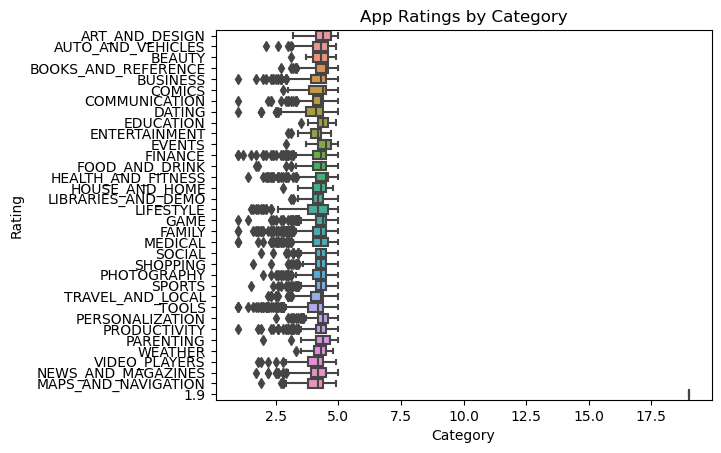

In [47]:
sns.boxplot(x='Rating',y='Category',data=df)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [ ]:
"""
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

"""

In [49]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
"""
If there are missing values in the dataset, they may impact your analysis depending on how you handle them. Some common ways to handle missing values include removing rows with missing values, filling in missing values with a mean or median value, or using a machine learning algorithm that can handle missing values.

If you choose to remove rows with missing values, you may end up with a smaller dataset that may not be representative of the entire population. If you choose to fill in missing values with a mean or median value, you may introduce bias into your analysis. If you choose to use a machine learning algorithm that can handle missing values, you may need to use a more complex algorithm that may be more difficult to interpret. Therefore, it's important to carefully consider the impact of missing values on your analysis and choose a strategy that is appropriate for your specific needs.

"""

In [ ]:
"""
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

"""

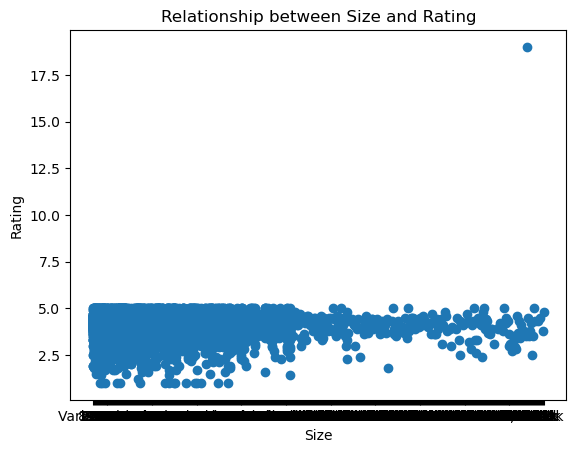

In [50]:
size =df['Size']
rating = df['Rating']

# Create a scatter plot
plt.scatter(size, rating)
plt.title('Relationship between Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

In [ ]:
"""
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
"""

In [54]:
"""
# Group the data by app type and calculate the average price for each group
avg_prices = df.groupby('Type')['Price'].mean()

# Create a bar chart of the data
avg_prices.plot(kind='bar')
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()

"""

"\n# Group the data by app type and calculate the average price for each group\navg_prices = df.groupby('Type')['Price'].mean()\n\n# Create a bar chart of the data\navg_prices.plot(kind='bar')\nplt.title('Average Price by App Type')\nplt.xlabel('App Type')\nplt.ylabel('Average Price')\nplt.show()\n\n"

In [ ]:
"""
Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

"""

In [55]:
# Calculate the frequency of each app in the dataset
app_counts = df['App'].value_counts()

# Print the top 10 most popular apps
print(app_counts.head(10))

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64


In [ ]:
"""
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?
"""

In [57]:
# Filter out missing data
df.dropna(subset=['Category', 'Installs'], inplace=True)

# Calculate the total number of installs for each app category
category_installs = df.groupby('Category')['Installs'].sum()

# Sort the results in descending order
category_installs = category_installs.sort_values(ascending=False)

# Display the top app categories with the highest number of installs
print(category_installs.head())

Category
1.9                                                          Free
PRODUCTIVITY    500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY          500,000+1,000,000+100,000+500,000+1,000,000+50...
FAMILY          50,000,000+10,000,000+100,000,000+1,000,000+5,...
WEATHER         50,000,000+1,000,000+50,000,000+10,000+10,000,...
Name: Installs, dtype: object


In [ ]:
"""
Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

"""

In [ ]:
"""
o identify the most successful app developers in the Google Playstore dataset, the following features can be analyzed:

Number of installs: The number of installs can indicate the popularity and success of an app. By analyzing the number of installs by developer, we can identify the developers with the most successful apps.

Average rating: The average rating of an app can indicate user satisfaction and the quality of the app. By analyzing the average rating by developer, we can identify the developers with the highest quality apps.

Number of reviews: The number of reviews can indicate the popularity and engagement of an app. By analyzing the number of reviews by developer, we can identify the developers with the most engaging apps.

To present the findings, we can use data visualizations such as:

Bar chart: A bar chart can be used to compare the number of installs, average rating, and number of reviews by developer.

Scatter plot: A scatter plot can be used to visualize the relationship between the number of installs and the average rating by developer.

Heatmap: A heatmap can be used to visualize the correlation between the number of installs, average rating, and number of reviews by developer.

Using these features and data visualizations, we can make recommendations to the company on the most successful app developers in the Google Playstore dataset.

"""

In [58]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
"""
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

"""

In [ ]:
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Convert the "Last Updated" column to datetime
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

# Create a new column for month
df["Month"] = df["Last Updated"].dt.month

# Group the data by month and calculate the mean for installs, rating, and price
monthly_data = df.groupby("Month").agg({
    "Installs": "mean",
    "Rating": "mean",
    "Price": "mean"
}).reset_index()

# Visualize the data using a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x="Month", y="value", hue="variable", 
             data=pd.melt(monthly_data, ["Month"]))
plt.title("Monthly Trends in Installs, Rating, and Price")
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()

# Visualize the data using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="value", hue="variable", 
            data=pd.melt(monthly_data, ["Month"]))
plt.title("Comparison of Installs, Rating, and Price Across Months")
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()

# Visualize the data using a heatmap
heatmap_data = df.groupby(["Month", "Installs"]).agg({
    "Rating": "mean"
}).reset_index()
heatmap_data = heatmap_data.pivot("Month", "Installs", "Rating")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Heatmap of Installs and Rating by Month")
plt.xlabel("Number of Installs")
plt.ylabel("Month")
plt.show()


"""